# American Express - Default Prediction 
## Predict If A Customer Will Default in the Future ...
The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

<img style="float: center;" src="https://img.freepik.com/free-vector/brain-with-digital-circuit-programmer-with-laptop-machine-learning-artificial-intelligence-digital-brain-artificial-thinking-process-concept-vector-isolated-illustration_335657-2246.jpg?w=2000" width = '550'>
<a href='https://www.freepik.com/vectors/machine-learning'>Machine learning vector created by vectorjuice - www.freepik.com</a>

#### Data Description
The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

* D_* = Delinquency variables
* S_* = Spend variables
* P_* = Payment variables
* B_* = Balance variables
* R_* = Risk variables

With the following features being categorical:

**['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']**

Your task is to predict, for each customer_ID, the probability of a future payment default (target = 1).

Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric.

**Files**
* train_data.csv - training data with multiple statement dates per customer_ID
* train_labels.csv - target label for each customer_ID
* test_data.csv - corresponding test data; your objective is to predict the target label for each customer_ID
* sample_submission.csv - a sample submission file in the correct format

---

## My Strategy, or How I Will Aproach this Competition...
We have data from many Customers and there is many points of information by for each of the customers, the target labels are only one per customer id so aggregation will be requiered, from here there is quie a lot of possibilities, this is what I will folow in this Notebook...

#### Loading the Datasets
The datasets is massive so I will rely on other Kaggles optimized datasets stored in a feather format to make my life easier in this competition.

#### Quick EDA
The typical analysis that I always like to complete to undertstand the dataset better...
* Information of the datasets, size and others.
* Simple visualization of the first few records.
* Data statistical analalysis using describe.
* Visualization of the number of NaNs.
* Understanding the amount of unique records.

#### Exploring the Target Variable
Nothing in particular dataset seems to be quite inbalanced so I will get back to this part later...

#### Structuring the Datasets
Here is where everything happens, because we have time-base data o multiple points per customer we are trying to aggregate the information in certain way that's practical:
* Statistical aggregation for numeric features
* Only keep the last know record for analysis
* Statictical aggregation for categorical features

#### Feature Engineering
At this point the only thing that I can consider some type of feature will be the aggregation of the datasets, as I mentioned in the previous point
* Statistical aggregation
* Only keep the last know record for analysis

#### Label Encoding
Because there is quite a lot of categorical variables and this is a NN model I will use the following encoding technique:
* OneHot encoder, only train in the train dataset and applyed on test

#### Fill NaNs**
At this point just to get started, I will fill everything with ceros, probably not a good idea.
* Fill NaNs with 0

#### Model Development and Training
I'm going to go first with an NN in the last few competitions the NN models have been working quite well also we have so much data.
* Simple NN tested, layer after later.
* I also tested a more complex NN, that I learned from Ambross with Skip conections.

#### Predictions and Submission
No much details here, just the simple average of all the predictions across multiple folds.
* Average predictions across 5 folds

---

## Updates
#### 05/28/2022
* Build the initial model using Neuronal Nets and simple agg strategy (Last data point).
* Evaluated the model and uploaded for Ranking.

#### 05/29/2022
* Improve model architecture.
* Really dive deep into Feature Engineering (Not much here, memory is a big chalenge)

#### 05/30/2022
* ...

---

## Resources, Inspiration
I have taken Ideas or learned quite a lot from the Notebooks below, please check also if you like my work.

* https://www.kaggle.com/code/ambrosm/amex-keras-quickstart-1-training/notebook
* ...
* ...
* ...

---

# 1.0 Loading Model Libraries...

In [1]:
%%time
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parquet-files-amexdefault-prediction/test_data.parquet
/kaggle/input/parquet-files-amexdefault-prediction/train_data.ftr
/kaggle/input/parquet-files-amexdefault-prediction/train_data.parquet
/kaggle/input/parquet-files-amexdefault-prediction/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
CPU times: user 0 ns, sys: 742 µs, total: 742 µs
Wall time: 5.51 ms


In [2]:
%%time
import datetime # ...

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.78 µs


---

# 2.0 Setting the Notebook Parameters and Default Configuration...

In [3]:
%%time
# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

CPU times: user 26 µs, sys: 3 µs, total: 29 µs
Wall time: 32.7 µs


In [4]:
%%time
# Notebook Configuration...

# Amount of data we want to load into the Model...
DATA_ROWS = None
# Dataframe, the amount of rows and cols to visualize...
NROWS = 50
NCOLS = 15
# Main data location path...
BASE_PATH = '...'

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [5]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_columns', NCOLS) 
pd.set_option('display.max_rows', NROWS)

CPU times: user 74 µs, sys: 0 ns, total: 74 µs
Wall time: 76.5 µs


---

# 3.0 Loading the Dataset Information (Using Feather)...

In [6]:
%%time
# Load the CSV information into a Pandas DataFrame...
trn_data = pd.read_feather('../input/parquet-files-amexdefault-prediction/train_data.ftr')
trn_lbls = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv').set_index('customer_ID')

tst_data = pd.read_feather('../input/parquet-files-amexdefault-prediction/test_data.ftr')

CPU times: user 25.5 s, sys: 10.9 s, total: 36.4 s
Wall time: 1min 1s


In [7]:
%%time
sub = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')

CPU times: user 865 ms, sys: 675 ms, total: 1.54 s
Wall time: 2.72 s


---

# 4.0 Exploring the Dataset, Quick EDA...

In [8]:
%%time
# Explore the shape of the DataFrame...
trn_data.shape

CPU times: user 16 µs, sys: 6 µs, total: 22 µs
Wall time: 25.3 µs


(5531451, 190)

In [9]:
%%time
# Display simple information of the variables in the dataset...
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 190 entries, customer_ID to D_145
dtypes: category(11), float16(176), int64(1), object(2)
memory usage: 2.0+ GB
CPU times: user 15.6 ms, sys: 2.84 ms, total: 18.4 ms
Wall time: 24.9 ms


In [10]:
%%time
# Display the first few rows of the DataFrame...
trn_data.head()

CPU times: user 207 µs, sys: 0 ns, total: 207 µs
Wall time: 212 µs


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.93848,0.00173,0.00873,1.00684,0.00922,...,0.00243,0.00371,0.00382,NaN,0.00057,0.00061,0.00267
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.93652,0.00578,0.00492,1.00098,0.00615,...,0.00396,0.00317,0.00503,NaN,0.00957,0.00549,0.00922
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.95410,0.09149,0.02165,1.00977,0.00682,...,0.00327,0.00733,0.00043,NaN,0.00343,0.00698,0.00260
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.96045,0.00245,0.01369,1.00293,0.00137,...,0.00612,0.00452,0.00320,NaN,0.00842,0.00653,0.00960
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.94727,0.00248,0.01519,1.00098,0.00761,...,0.00367,0.00494,0.00889,NaN,0.00167,0.00813,0.00983


In [11]:
%%time
# Display the Min Date...
trn_data['S_2'].min()

CPU times: user 730 ms, sys: 1.76 ms, total: 732 ms
Wall time: 729 ms


'2017-03-01'

In [12]:
%%time
# Display the Max Date...
trn_data['S_2'].max()

CPU times: user 721 ms, sys: 3.33 ms, total: 724 ms
Wall time: 724 ms


'2018-03-31'

In [13]:
%%time
# Generate a simple statistical summary of the DataFrame, Only Numerical...
trn_data.describe()

CPU times: user 2min 22s, sys: 2.61 s, total: 2min 24s
Wall time: 2min 25s


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,"5,485,466.00000","5,531,451.00000","5,531,451.00000","5,529,435.00000","5,531,451.00000","4,510,907.00000","5,529,435.00000",...,"5,429,903.00000","5,490,819.00000","5,429,903.00000","944,408.00000","5,429,903.00000","5,490,724.00000","5,429,903.00000"
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
min,-0.45898,0.00000,-7.58984,0.00000,0.00000,-0.62695,0.00000,...,0.00000,0.00000,0.00000,-0.01454,0.00000,0.00000,0.00000
25%,0.48022,0.00453,0.00887,0.10535,0.00290,0.12732,0.00287,...,0.00303,0.00256,0.00303,0.19934,0.00303,0.00275,0.00303
50%,0.69434,0.00906,0.03134,0.81445,0.00578,0.16394,0.00574,...,0.00605,0.00511,0.00605,0.38208,0.00605,0.00551,0.00605
75%,0.86475,0.23669,0.12585,1.00195,0.00866,0.25806,0.00861,...,0.00908,0.00766,0.00908,0.55908,0.00908,0.00826,0.00908
max,1.00977,5.39062,1.32422,1.00977,3.25586,5.48438,8.99219,...,1.00977,1.00977,1.33984,2.22852,1.00977,1.34375,4.82812


In [14]:
%%time
# Calculates the total number of missing values...
trn_data.isnull().sum().sum()

CPU times: user 5.08 s, sys: 189 ms, total: 5.27 s
Wall time: 5.27 s


160858968

In [15]:
%%time
# Display the number of missing values by variable...
trn_data.isnull().sum()

CPU times: user 5.79 s, sys: 190 ms, total: 5.98 s
Wall time: 6.01 s


customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_141           101548
D_142          4587043
D_143           101548
D_144            40727
D_145           101548
Length: 190, dtype: int64

In [16]:
%%time
# Display the number of unique values for each variable...
trn_data.nunique()

CPU times: user 13.4 s, sys: 1.19 s, total: 14.6 s
Wall time: 14.6 s


customer_ID    458913
S_2               396
P_2             17205
D_39            11242
B_1             22627
                ...  
D_141            9055
D_142           14075
D_143            8491
D_144           15412
D_145            9228
Length: 190, dtype: int64

In [17]:
%%time
# Display the number of unique values for each variable, sorted by quantity...
trn_data.nunique().sort_values(ascending = True)

CPU times: user 13.4 s, sys: 1.2 s, total: 14.6 s
Wall time: 14.6 s


D_87                1
B_31                2
D_114               2
D_116               2
D_120               2
                ...  
B_15            23154
B_37            23906
B_25            24710
B_14            25845
customer_ID    458913
Length: 190, dtype: int64

---

# 5.0 Understanding the Target Variable...

In [18]:
%%time
# Explore the shape of the DataFrame...
trn_lbls.shape

CPU times: user 22 µs, sys: 2 µs, total: 24 µs
Wall time: 29.3 µs


(458913, 1)

In [19]:
%%time
# Display simple information of the variables in the dataset...
trn_lbls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   target  458913 non-null  int64
dtypes: int64(1)
memory usage: 7.0+ MB
CPU times: user 8.5 ms, sys: 0 ns, total: 8.5 ms
Wall time: 8.46 ms


In [20]:
%%time
# Check how well balanced is the dataset
trn_lbls['target'].value_counts()

CPU times: user 4.56 ms, sys: 47 µs, total: 4.61 ms
Wall time: 4.94 ms


0    340085
1    118828
Name: target, dtype: int64

In [21]:
%%time
# Check some statistics on the target variable
trn_lbls['target'].describe()

CPU times: user 14.8 ms, sys: 0 ns, total: 14.8 ms
Wall time: 17 ms


count   458,913.00000
mean          0.25893
std           0.43805
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max           1.00000
Name: target, dtype: float64

---

# 6.0 Structuring Data for the Model (Aggreations and More)

## 6.1 Training Dataset...

In [22]:
%%time
# We have 458913 customers. and we have 458913 train labels...

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.54 µs


In [23]:
%%time
# Calculates the amount of information by costumer or records available...
trn_num_statements = trn_data.groupby('customer_ID').size().sort_index()

CPU times: user 1.5 s, sys: 92.4 ms, total: 1.59 s
Wall time: 1.61 s


In [24]:
%%time
# Review some of the information created...
trn_num_statements

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5    13
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1    13
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc    13
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed    13
                                                                    ..
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7    13
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286    13
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6    13
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461    13
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    13
Length: 458913, dtype: int64

In [25]:
%%time
# Create a new dataset based on aggregated information
trn_agg_data = (trn_data
                .groupby('customer_ID')
                .tail(1)
                .set_index('customer_ID', drop=True)
                .sort_index()
                .drop(['S_2'], axis='columns'))

# Merge the labels from the labels dataframe
trn_agg_data['target'] = trn_lbls.target
trn_agg_data['num_statements'] = trn_num_statements

trn_agg_data.reset_index(inplace = True, drop = True) # forget the customer_IDs

CPU times: user 2.19 s, sys: 610 ms, total: 2.8 s
Wall time: 2.8 s


In [26]:
%%time
trn_agg_data.head()

CPU times: user 184 µs, sys: 15 µs, total: 199 µs
Wall time: 203 µs


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_141,D_142,D_143,D_144,D_145,target,num_statements
0,0.93457,0.00912,0.00938,1.00781,0.00610,0.13501,0.00160,...,0.00508,NaN,0.00581,0.00297,0.00853,0,13
1,0.88037,0.17810,0.03470,1.00391,0.00691,0.16553,0.00555,...,0.00787,NaN,0.00328,0.00317,0.00851,0,13
2,0.88086,0.00970,0.00428,0.81250,0.00645,NaN,0.00380,...,0.00096,NaN,0.00220,0.00083,0.00344,0,13
3,0.62158,0.00108,0.01257,1.00586,0.00783,0.28784,0.00453,...,0.00190,NaN,0.00819,0.00556,0.00298,0,13
4,0.87207,0.00557,0.00768,0.81592,0.00125,NaN,0.00023,...,0.00576,NaN,0.00816,0.00694,0.00090,0,13


---

## 6.2 Test Dataset...

In [27]:
%%time
# Calculates the amount of information by costumer or records available...
tst_num_statements = tst_data.groupby('customer_ID').size().sort_index()

CPU times: user 2.65 s, sys: 169 ms, total: 2.82 s
Wall time: 2.82 s


In [28]:
%%time
# Create a new dataset based on aggregated information
tst_agg_data = (tst_data
                .groupby('customer_ID')
                .tail(1)
                .set_index('customer_ID', drop=True)
                .sort_index()
                .drop(['S_2'], axis='columns'))

# Merge the labels from the labels dataframe
tst_agg_data['num_statements'] = tst_num_statements

tst_agg_data.reset_index(inplace = True, drop = True) # forget the customer_IDs

CPU times: user 4.64 s, sys: 1.24 s, total: 5.88 s
Wall time: 5.92 s


In [29]:
%%time
tst_agg_data.head()

CPU times: user 210 µs, sys: 19 µs, total: 229 µs
Wall time: 234 µs


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_140,D_141,D_142,D_143,D_144,D_145,num_statements
0,0.56885,0.12140,0.01078,1.00977,0.00692,0.14941,0.00040,...,0.00125,0.00654,NaN,0.00916,0.00369,0.00322,9
1,0.84131,0.12646,0.01656,1.00879,0.00971,0.11218,0.00619,...,0.00087,0.00912,NaN,0.00220,0.00025,0.00778,13
2,0.69775,0.00272,0.00148,0.81006,0.00262,0.16614,0.00489,...,0.00890,0.89600,0.15015,1.00977,0.45776,0.09204,13
3,0.51318,0.32471,0.14954,0.20569,0.00228,0.18115,0.00581,...,0.00375,0.91992,0.25537,1.00781,0.50098,0.18298,13
4,0.25439,0.76807,0.56348,0.03802,0.50293,0.16833,0.00948,...,0.00114,0.00953,NaN,0.00941,0.00156,0.00052,13


---

# 7.0 Label / One-Hot Encoding the Categorical Variables...

## 7.1 One Hot Encoding Configuration...

In [30]:
%%time
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder, OrdinalEncoder

CPU times: user 424 ms, sys: 162 ms, total: 586 ms
Wall time: 953 ms


In [31]:
%%time
# One-hot Encoding Configuration
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

#trn_agg_data[cat_features] = trn_agg_data[cat_features].astype(object)
trn_not_cat_features = [f for f in trn_agg_data.columns if f not in cat_features]
tst_not_cat_features = [f for f in tst_agg_data.columns if f not in cat_features]

CPU times: user 178 µs, sys: 0 ns, total: 178 µs
Wall time: 182 µs


In [32]:
%%time
trn_agg_data[cat_features].head()

CPU times: user 6.04 ms, sys: 1 ms, total: 7.05 ms
Wall time: 6.07 ms


,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.00000,2.00000,1.00000,0.00000,4.00000,0.00000,1.00000,CR,O,NaN,6.00000
1,0.00000,2.00000,1.00000,0.00000,-1.00000,0.00000,1.00000,CO,O,NaN,6.00000
2,0.00000,1.00000,1.00000,0.00000,-1.00000,0.00000,1.00000,CO,R,NaN,6.00000
3,0.00000,2.00000,1.00000,0.00000,6.00000,0.00000,1.00000,CO,O,NaN,3.00000
4,0.00000,1.00000,1.00000,0.00000,4.00000,0.00000,1.00000,CO,O,1.00000,6.00000


In [33]:
%%time
#encoder = OneHotEncoder(drop = 'first', sparse = False, dtype = np.float32, handle_unknown = 'ignore')
encoder = OrdinalEncoder()
trn_encoded_features = encoder.fit_transform(trn_agg_data[cat_features])
#feat_names = list(encoder.get_feature_names())

CPU times: user 674 ms, sys: 24.9 ms, total: 699 ms
Wall time: 699 ms


## 7.2 Train Dataset One Hot Encoding...

In [34]:
%%time
# One-hot Encoding
trn_encoded_features = pd.DataFrame(trn_encoded_features)
#trn_encoded_features.columns = feat_names

CPU times: user 197 µs, sys: 17 µs, total: 214 µs
Wall time: 218 µs


In [35]:
%%time
trn_agg_data = pd.concat([trn_agg_data[trn_not_cat_features], trn_encoded_features], axis = 1)
trn_agg_data.head(5)

CPU times: user 255 ms, sys: 323 ms, total: 578 ms
Wall time: 578 ms


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.93457,0.00912,0.00938,1.00781,0.00610,0.13501,0.00160,...,4.00000,0.00000,1.00000,2.00000,0.00000,NaN,5.00000
1,0.88037,0.17810,0.03470,1.00391,0.00691,0.16553,0.00555,...,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,5.00000
2,0.88086,0.00970,0.00428,0.81250,0.00645,NaN,0.00380,...,0.00000,0.00000,1.00000,1.00000,1.00000,NaN,5.00000
3,0.62158,0.00108,0.01257,1.00586,0.00783,0.28784,0.00453,...,6.00000,0.00000,1.00000,1.00000,0.00000,NaN,2.00000
4,0.87207,0.00557,0.00768,0.81592,0.00125,NaN,0.00023,...,4.00000,0.00000,1.00000,1.00000,0.00000,0.00000,5.00000


---

## 7.3 Test Dataset One-Hot Encoding...

In [36]:
%%time
tst_agg_data[cat_features].head()

CPU times: user 8.5 ms, sys: 44 µs, total: 8.54 ms
Wall time: 7.47 ms


,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.00000,2.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,CR,U,NaN,6.00000
1,0.00000,2.00000,1.00000,0.00000,3.00000,0.00000,1.00000,CO,O,NaN,6.00000
2,0.00000,2.00000,0.00000,0.00000,3.00000,0.00000,0.00000,CR,U,1.00000,4.00000
3,0.00000,3.00000,0.00000,0.00000,4.00000,0.00000,1.00000,CL,R,NaN,5.00000
4,1.00000,6.00000,0.00000,0.00000,-1.00000,1.00000,0.00000,CO,R,NaN,5.00000


In [37]:
%%time
# One-hot Encoding
tst_encoded_features = encoder.transform(tst_agg_data[cat_features])
tst_encoded_features = pd.DataFrame(tst_encoded_features)
#tst_encoded_features.columns = feat_names

CPU times: user 1.07 s, sys: 73.9 ms, total: 1.14 s
Wall time: 1.14 s


In [38]:
%%time
tst_agg_data = pd.concat([tst_agg_data[tst_not_cat_features], tst_encoded_features], axis = 1)
tst_agg_data.head()

CPU times: user 539 ms, sys: 633 ms, total: 1.17 s
Wall time: 1.17 s


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,4,5,6,7,8,9,10
0,0.56885,0.12140,0.01078,1.00977,0.00692,0.14941,0.00040,...,0.00000,1.00000,0.00000,2.00000,2.00000,NaN,5.00000
1,0.84131,0.12646,0.01656,1.00879,0.00971,0.11218,0.00619,...,3.00000,0.00000,1.00000,1.00000,0.00000,NaN,5.00000
2,0.69775,0.00272,0.00148,0.81006,0.00262,0.16614,0.00489,...,3.00000,0.00000,0.00000,2.00000,2.00000,0.00000,3.00000
3,0.51318,0.32471,0.14954,0.20569,0.00228,0.18115,0.00581,...,4.00000,0.00000,1.00000,0.00000,1.00000,NaN,4.00000
4,0.25439,0.76807,0.56348,0.03802,0.50293,0.16833,0.00948,...,0.00000,1.00000,0.00000,1.00000,1.00000,NaN,4.00000


---

# 8.0 Pre-Processing the Data, Fill NaNs for model functionality...

In [39]:
%%time
# Impute missing values
trn_agg_data.fillna(value = 0, inplace = True)
tst_agg_data.fillna(value = 0, inplace = True)

CPU times: user 1.31 s, sys: 209 ms, total: 1.52 s
Wall time: 1.52 s


---

# 9.0 Feature Selection for Baseline Model...

In [40]:
%%time
features = [f for f in trn_agg_data.columns if f != 'target' and f != 'customer_ID']

CPU times: user 118 µs, sys: 11 µs, total: 129 µs
Wall time: 163 µs


---

# 10.0 NN Development

In [41]:
%%time
# Release some memory by deleting the original DataFrames...
import gc
del trn_data, tst_data
gc.collect()

CPU times: user 128 ms, sys: 11 ms, total: 139 ms
Wall time: 137 ms


0

## 10.1 Loading Specific Model Libraries...

In [42]:
%%time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, InputLayer, Add, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.utils import plot_model
from sklearn.metrics import log_loss

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import random

CPU times: user 2.06 s, sys: 877 ms, total: 2.94 s
Wall time: 6 s


---

## 10.2 Amex Metric, Function...

In [43]:
%%time
# From https://www.kaggle.com/code/inversion/amex-competition-metric-python

def amex_metric(y_true, y_pred, return_components=False) -> float:
    """Amex metric for ndarrays"""
    
    def top_four_percent_captured(df) -> float:
        """Corresponds to the recall for a threshold of 4 %"""
        
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
    
    
    def weighted_gini(df) -> float:
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    
    def normalized_weighted_gini(df) -> float:
        """Corresponds to 2 * AUC - 1"""
        
        df2 = pd.DataFrame({'target': df.target, 'prediction': df.target})
        df2.sort_values('prediction', ascending=False, inplace=True)
        return weighted_gini(df) / weighted_gini(df2)

    
    df = pd.DataFrame({'target': y_true.ravel(), 'prediction': y_pred.ravel()})
    df.sort_values('prediction', ascending=False, inplace=True)
    g = normalized_weighted_gini(df)
    d = top_four_percent_captured(df)

    if return_components: return g, d, 0.5 * (g + d)
    return 0.5 * (g + d)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.34 µs


---

## 10.3 Defining the NN Model Architecture...

## 10.3.1 Architecture 01, Simple NN

In [44]:
%%time
def nn_model():
    '''
    '''
    regularization = 4e-4
    activation_func = 'swish'
    inputs = Input(shape = (len(features)))
    
    x = Dense(256, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(inputs)
    
    x = BatchNormalization()(x)
    
    x = Dense(64, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(x)
    
    x = BatchNormalization()(x)
    
    x = Dense(64, 
          #use_bias  = True, 
          kernel_regularizer = tf.keras.regularizers.l2(regularization), 
          activation = activation_func)(x)
    
    x = BatchNormalization()(x)

    x = Dense(32, 
              #use_bias  = True, 
              kernel_regularizer = tf.keras.regularizers.l2(regularization), 
              activation = activation_func)(x)
    
    x = BatchNormalization()(x)

    x = Dense(1, 
              #use_bias  = True, 
              #kernel_regularizer = tf.keras.regularizers.l2(regularization),
              activation = 'sigmoid')(x)
    
    model = Model(inputs, x)
    
    return model

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


---

## 10.3.2 Architecture 02, Concatenated NN

In [45]:
%%time
def nn_model():
    regularization = 4e-4
    activation_func = 'swish'
    inputs = Input(shape = (len(features)))

    x0 = Dense(256,
               kernel_regularizer = tf.keras.regularizers.l2(regularization), 
               activation = activation_func)(inputs)
    x1 = Dense(128,
               kernel_regularizer = tf.keras.regularizers.l2(regularization),
               activation = activation_func)(x0)
    x1 = Dense(64,
               kernel_regularizer = tf.keras.regularizers.l2(regularization),
               activation = activation_func)(x1)
    x1 = Dense(32,
           kernel_regularizer = tf.keras.regularizers.l2(regularization),
           activation = activation_func)(x1)
    
    x1 = Concatenate()([x1, x0])
    x1 = Dropout(0.1)(x1)
    
    x1 = Dense(16, kernel_regularizer=tf.keras.regularizers.l2(regularization),activation=activation_func,)(x1)
    
    x1 = Dense(1, 
              #kernel_regularizer=tf.keras.regularizers.l2(regularization),
              activation='sigmoid')(x1)
    
    model = Model(inputs, x1)
    
    return model
    

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


---

## 10.4 Visualizing the Model Structure...

In [46]:
%%time
architecture = nn_model()
architecture.summary()

2022-06-01 13:01:23.259876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 13:01:23.429487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 13:01:23.430306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 13:01:23.431949: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 189)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          48640       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          32896       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

CPU times: user 63 ms, sys: 125 ms, total: 188 ms
Wall time: 1.24 s


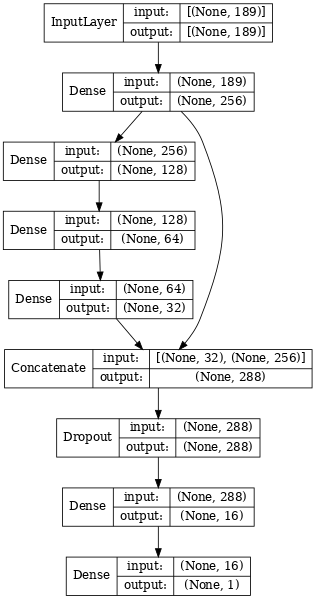

In [47]:
%%time
plot_model(nn_model(), show_layer_names = False, show_shapes = True, dpi = 60)

---

## 10.5 Defining Model Training Parameters...

In [48]:
%%time
# Defining model parameters...
BATCH_SIZE         = 2048
EPOCHS             = 192 
EPOCHS_COSINEDECAY = 192 
DIAGRAMS           = True
USE_PLATEAU        = False
INFERENCE          = False
VERBOSE            = 0 
TARGET             = 'target'

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


---

## 10.6 Defining the Model Training Configuration...

In [49]:
 %%time
# Defining model training function...
def fit_model(X_train, y_train, X_val, y_val, run = 0):
    '''
    '''
    lr_start = 0.01
    start_time = datetime.datetime.now()
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    epochs = EPOCHS    
    lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, patience = 4, verbose = VERBOSE)
    es = EarlyStopping(monitor = 'val_loss',patience = 12, verbose = 1, mode = 'min', restore_best_weights = True)
    tm = tf.keras.callbacks.TerminateOnNaN()
    callbacks = [lr, es, tm]
    
    # Cosine Learning Rate Decay
    if USE_PLATEAU == False:
        epochs = EPOCHS_COSINEDECAY
        lr_end = 0.0002

        def cosine_decay(epoch):
            if epochs > 1:
                w = (1 + math.cos(epoch / (epochs - 1) * math.pi)) / 2
            else:
                w = 1
            return w * lr_start + (1 - w) * lr_end
        
        lr = LearningRateScheduler(cosine_decay, verbose = 0)
        callbacks = [lr, tm]
    
    # Model Initialization...
    model = nn_model()
    optimizer_func = tf.keras.optimizers.Adam(learning_rate = lr_start)
    loss_func = tf.keras.losses.BinaryCrossentropy()
    model.compile(optimizer = optimizer_func, loss = loss_func)
    
    
    X_val = scaler.transform(X_val)
    validation_data = (X_val, y_val)
    
    history = model.fit(X_train, 
                        y_train, 
                        validation_data = validation_data, 
                        epochs          = epochs,
                        verbose         = VERBOSE,
                        batch_size      = BATCH_SIZE,
                        shuffle         = True,
                        callbacks       = callbacks
                       )
    
    history_list.append(history.history)
    
    print(f'Training Loss: {history_list[-1]["loss"][-1]:.5f}, Validation Loss: {history_list[-1]["val_loss"][-1]:.5f}')
    callbacks, es, lr, tm, history = None, None, None, None, None
    
    
    y_val_pred = model.predict(X_val, batch_size = BATCH_SIZE, verbose = VERBOSE).ravel()
    amex_score = amex_metric(y_val.values, y_val_pred, return_components = False)
    
    print(f'Fold {run}.{fold} | {str(datetime.datetime.now() - start_time)[-12:-7]}'
          f'| Amex Score: {amex_score:.5f}')
    
    print('')
    
    score_list.append(amex_score)
    
    tst_data_scaled = scaler.transform(tst_agg_data[features])
    tst_pred = model.predict(tst_data_scaled)
    predictions.append(tst_pred)
    
    return model

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


---

## 10.7 Creating a Model Training Loop and Cross Validating in 5 Folds... 

In [50]:
%%time
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
import math

# Create empty lists to store NN information...
history_list = []
score_list   = []
predictions  = []

# Define kfolds for training purposes...
kf = KFold(n_splits = 5)

for fold, (trn_idx, val_idx) in enumerate(kf.split(trn_agg_data)):
    X_train, X_val = trn_agg_data.iloc[trn_idx][features], trn_agg_data.iloc[val_idx][features]
    y_train, y_val = trn_agg_data.iloc[trn_idx][TARGET], trn_agg_data.iloc[val_idx][TARGET]
    
    fit_model(X_train, y_train, X_val, y_val)
    
print(f'OOF AUC: {np.mean(score_list):.5f}')

2022-06-01 13:01:32.846202: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Training Loss: 0.22576, Validation Loss: 0.22949
Fold 0.0 | 02:51| Amex Score: 0.78215



2022-06-01 13:04:26.078102: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 699013476 exceeds 10% of free system memory.
2022-06-01 13:04:26.779453: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 699013476 exceeds 10% of free system memory.


Training Loss: 0.22580, Validation Loss: 0.22946
Fold 0.1 | 03:25| Amex Score: 0.78102



2022-06-01 13:08:39.652095: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 699013476 exceeds 10% of free system memory.
2022-06-01 13:08:40.367471: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 699013476 exceeds 10% of free system memory.


Training Loss: 0.22636, Validation Loss: 0.22729
Fold 0.2 | 02:49| Amex Score: 0.78334



2022-06-01 13:12:16.277467: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 699013476 exceeds 10% of free system memory.


Training Loss: 0.22665, Validation Loss: 0.22585
Fold 0.3 | 02:51| Amex Score: 0.78439

Training Loss: 0.22688, Validation Loss: 0.22541
Fold 0.4 | 02:53| Amex Score: 0.78606

OOF AUC: 0.78339
CPU times: user 22min 41s, sys: 1min 41s, total: 24min 23s
Wall time: 18min 19s


---

# 11.0 Model Prediction and Submissions

In [51]:
%%time
sub.head()

CPU times: user 188 µs, sys: 14 µs, total: 202 µs
Wall time: 767 µs


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0


In [52]:
%%time
sub['prediction'] = np.array(predictions).mean(axis = 0)

CPU times: user 9.4 ms, sys: 11 µs, total: 9.41 ms
Wall time: 10.1 ms


In [53]:
%%time
sub.to_csv('my_submission.csv', index = False)

CPU times: user 4.25 s, sys: 90.9 ms, total: 4.34 s
Wall time: 4.37 s


In [54]:
%%time
sub.head()

CPU times: user 113 µs, sys: 9 µs, total: 122 µs
Wall time: 127 µs


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.02286
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.00233
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.03613
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.42969
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.90672


---